# WeatherPy
----

#### OBSERVATIONAL TRENDS
1. As the city get closer to the equator, the temperatire rises. Could follow up and test for a quadratic regression.

2. There does not seem to be a correlation between cloudiness, humidity, or wind speed, and the latitude location of a city.

3. The Northern Hemisphere seems to have a greater range in max temputeratures than the Southern Hemisphere.


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from config_weather_GH import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
#pip install citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Perform a test run on one city to find all components in the json file. 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "elizabethtown"
units = "Imperial"
query_url = f"{url}appid={api_key}&q={city}&units={units}"
#query_url = f"{url}appid={api_key}&q={city}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

Temp = weather_json['main']["temp"]
Temp
Max_Temp = weather_json["main"]["temp_max"]
Latitude = weather_json['coord']['lat']
Latitude
Longitude = weather_json["coord"]["lon"]
Humidity = weather_json["main"]["humidity"]
Humidity
Cloudiness = weather_json["clouds"]["all"]
Cloudiness
Wind_Speed = weather_json["wind"]["speed"]
Wind_Speed
Country = weather_json["sys"]["country"]
Country
Date = weather_json["dt"]
Date
weather_json


{'coord': {'lon': -85.86, 'lat': 37.69},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 83.59,
  'feels_like': 85.6,
  'temp_min': 82.4,
  'temp_max': 86,
  'pressure': 1016,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 280},
 'clouds': {'all': 1},
 'dt': 1597706207,
 'sys': {'type': 1,
  'id': 3967,
  'country': 'US',
  'sunrise': 1597662084,
  'sunset': 1597710821},
 'timezone': -14400,
 'id': 4290988,
 'name': 'Elizabethtown',
 'cod': 200}

In [4]:
#Build DataFrame to house new info gathered from the API requests
Weather_df = pd.DataFrame({
    "City" : cities
})
    

#Weather_df["City"] = ""
Weather_df["Latitude"] = ""
Weather_df["Longitude"] = ""
Weather_df["Max Temp"] = ""
Weather_df["Humidity"] = ""
Weather_df["Cloudiness"] = ""
Weather_df["Wind Speed"] = ""
Weather_df["Country"] = ""

Weather_df.head(10)
type(Weather_df)

pandas.core.frame.DataFrame

In [ ]:
#Practice data frame to loop through cities
#cities = ["Bakersfield", "belushya guba","Los Angeles", "San Diego", ]
#practice_df = pd.DataFrame({
#    "City" : cities
#})
#practice_df["Latitude"] = ""
#practice_df["Longitude"] = ""
#practice_df["Max Temp"] = ""
#practice_df["Humidity"] = ""
#practice_df["Cloudiness"] = ""
#practice_df["Wind Speed"] = ""
#practice_df["Country"] = ""
#practice_df["Date"] = ""

#units = "Imperial"

#request_count = 0
#practice_df

#for index, row in practice_df.iterrows():
   # try:
      #  city = row['City']
      #  url = "http://api.openweathermap.org/data/2.5/weather?"
     #   query_url = f"{url}appid={api_key}&q={city}&units={units}"
    #    practice_response = requests.get(query_url)
    #    practice_json = practice_response.json()
  #  
    #    practice_df.loc[index, "Latitude"] = practice_json['coord']['lat']
    #    request_count = request_count +1
    
     #   print(f"Request number {request_count} for {city}")
        
   # except:
   #     print(f"{city} is not found in the database")
   #     continue
#practice_df.head()

   
    
    
    

In [5]:
#Loop through city name and request new column data for each city
city = cities
units = "Imperial"
request_count = 0
for index, row in Weather_df.iterrows():
    try:
        city = row['City']
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        Weather_df.loc[index, "Latitude"] = weather_json["coord"]["lat"]
        Weather_df.loc[index, "Longitude"] = weather_json["coord"]["lon"]
        Weather_df.loc[index, "Max Temp"] = weather_json["main"]["temp_max"]
        Weather_df.loc[index, "Humidity"] = weather_json["main"]["humidity"]
        Weather_df.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        Weather_df.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
        Weather_df.loc[index, "Country"] = weather_json["sys"]["country"]
        Date = weather_json["dt"]
        
        request_count = request_count +1
        print(f"Request number {request_count} for {city}")
    except:
        print(f"{city} is not found in the database")
        continue




Request number 1 for grand gaube
Request number 2 for hermanus
Request number 3 for barrow
Request number 4 for magnolia
Request number 5 for busselton
Request number 6 for caramay
Request number 7 for port alfred
mys shmidta is not found in the database
Request number 8 for rikitea
Request number 9 for norman wells
Request number 10 for sorland
Request number 11 for mataura
Request number 12 for san patricio
Request number 13 for bayan
Request number 14 for tiksi
Request number 15 for guerrero negro
Request number 16 for ushuaia
Request number 17 for yellowknife
Request number 18 for vaini
Request number 19 for bredasdorp
Request number 20 for coquimbo
Request number 21 for jamestown
Request number 22 for port hardy
Request number 23 for soure
Request number 24 for carnarvon
Request number 25 for rio cuarto
Request number 26 for butaritari
Request number 27 for karasburg
Request number 28 for ugoofaaru
Request number 29 for saint george
Request number 30 for albany
Request number 31 f

Request number 231 for labuan
Request number 232 for kishorganj
Request number 233 for kuldiga
Request number 234 for puerto escondido
Request number 235 for ouagadougou
Request number 236 for biltine
Request number 237 for poum
Request number 238 for flin flon
Request number 239 for laguna
Request number 240 for chumikan
Request number 241 for caravelas
Request number 242 for ankara
Request number 243 for victoria
ruatoria is not found in the database
Request number 244 for koryazhma
Request number 245 for hilo
Request number 246 for yakeshi
Request number 247 for narsaq
Request number 248 for margate
Request number 249 for erenhot
Request number 250 for bar harbor
Request number 251 for angoche
Request number 252 for dukat
Request number 253 for ajdabiya
Request number 254 for cockburn town
Request number 255 for savannah bight
Request number 256 for punta cardon
Request number 257 for mount gambier
Request number 258 for kashi
Request number 259 for karaton
Request number 260 for fo

Request number 464 for tullahoma
Request number 465 for liverpool
Request number 466 for souris
Request number 467 for moindou
Request number 468 for vargashi
Request number 469 for leningradskiy
Request number 470 for lere
mendahara is not found in the database
Request number 471 for okitipupa
Request number 472 for along
Request number 473 for sassandra
Request number 474 for shellbrook
Request number 475 for gorodovikovsk
Request number 476 for noumea
Request number 477 for maniwaki
Request number 478 for ornskoldsvik
Request number 479 for ribeira grande
Request number 480 for jining
Request number 481 for nichinan
Request number 482 for borogontsy
Request number 483 for san quintin
Request number 484 for manzanillo
Request number 485 for kamaishi
Request number 486 for vila franca do campo
Request number 487 for maarianhamina
Request number 488 for quchan
Request number 489 for mandeville
Request number 490 for scotts valley
Request number 491 for sao felix do xingu
Request number

In [6]:
Weather_df.head()
type(Weather_df)
len(Weather_df)

610

In [7]:
#Replace any empty values with NaN so that they can be dropped
Nan_df = Weather_df.replace('', np.nan, regex=True)
Nan_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,grand gaube,-20.01,57.66,71.01,72.0,3.0,5.99,MU
1,hermanus,-34.42,19.23,48.00,78.0,88.0,5.99,ZA
2,barrow,71.29,-156.79,50.00,76.0,1.0,19.46,US
3,magnolia,33.27,-93.24,93.00,46.0,23.0,4.00,US
4,busselton,-33.65,115.33,52.00,82.0,96.0,14.36,AU


In [10]:
#Drop all NaN values
Weather_Final = Nan_df.dropna(how='any')
type(Weather_Final)
len(Weather_Final)
Weather_Final.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,grand gaube,-20.01,57.66,71.01,72.0,3.0,5.99,MU
1,hermanus,-34.42,19.23,48.00,78.0,88.0,5.99,ZA
2,barrow,71.29,-156.79,50.00,76.0,1.0,19.46,US
3,magnolia,33.27,-93.24,93.00,46.0,23.0,4.00,US
4,busselton,-33.65,115.33,52.00,82.0,96.0,14.36,AU


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Export to csv file
Weather_Final.to_csv(r"Weather_Final_DataFrame.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
Weather_Final.loc[Weather_Final["Humidity"]>100]


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [13]:
#  Get the indices of cities that have humidity over 100%.
print("No cities with humidity > 100")

No cities with humidity > 100


In [30]:
#Configure today's Date

today = datetime.date.today()
Date_For_Graphs = today.strftime("%b %d %Y")
Date_For_Graphs

'Aug 17 2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

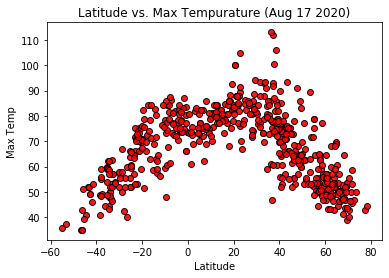

<Figure size 432x288 with 0 Axes>

In [48]:
Max_Temp = Weather_Final["Max Temp"]
Max_Temp
Latitude = Weather_Final["Latitude"]
Latitude
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="red", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Max Tempurature ({Date_For_Graphs})")
plt.ylabel('Max Temp')
plt.xlabel("Latitude")
plt.show()
plt.savefig("Lat vs Max Temp")


The code is comparing the latitude coordinates for each city to the max temp by creating variable to store just those two components of the Data Frame. Used matplotlib's scatter plot feature the display the results.

## Latitude vs. Humidity Plot

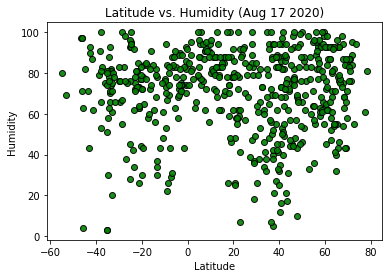

<Figure size 432x288 with 0 Axes>

In [49]:
Humidity = Weather_Final["Humidity"]
Humidity
plt.scatter(Latitude, Humidity, marker="o", facecolors="green", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Humidity ({Date_For_Graphs})")
plt.ylabel('Humidity')
plt.xlabel("Latitude")
plt.show()
plt.savefig("Lat vs Humidiy")

The code is comparing the latitude coordinates for each city to the humidity by creating variable to store just those two components of the Data Frame. Used matplotlib's scatter plot feature the display the results.

## Latitude vs. Cloudiness Plot

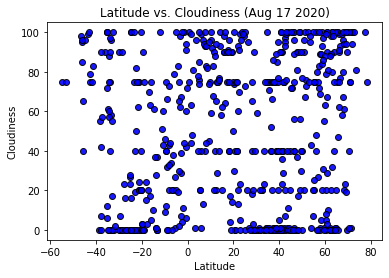

<Figure size 432x288 with 0 Axes>

In [50]:
Cloudiness = Weather_Final["Cloudiness"]
Humidity
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="blue", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Cloudiness ({Date_For_Graphs})")
plt.ylabel('Cloudiness')
plt.xlabel("Latitude")
plt.show()
plt.savefig("Lat vs Cloudiness")

The code is comparing the latitude coordinates for each city to the cloudiness by creating variable to store just those two components of the Data Frame. Used matplotlib's scatter plot feature the display the results.

## Latitude vs. Wind Speed Plot

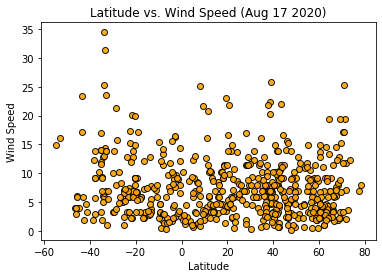

<Figure size 432x288 with 0 Axes>

In [51]:
Wind_Speed = Weather_Final["Wind Speed"]
Humidity
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="orange", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Wind Speed ({Date_For_Graphs})")
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.show()
plt.savefig("Lat vs Wind Speed")

The code is comparing the latitude coordinates for each city to the wind speed by creating variable to store just those two components of the Data Frame. Used matplotlib's scatter plot feature the display the results.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

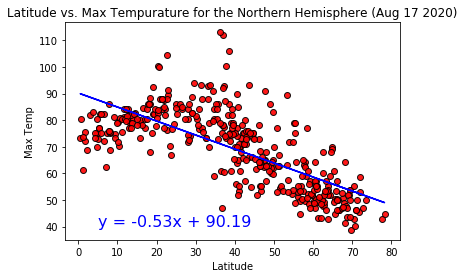

The r-squared is: 0.5195982023983896


<Figure size 432x288 with 0 Axes>

In [52]:
Northern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] >0]
Northern_Hemisphere.head()
len(Northern_Hemisphere)
Max_Temp_NH = Northern_Hemisphere["Max Temp"]
Max_Temp_NH
Latitude_NH = Northern_Hemisphere["Latitude"]
Latitude_NH
plt.scatter(Latitude_NH, Max_Temp_NH, marker="o", facecolors="red", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Max Tempurature for the Northern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Max Temp')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_NH, Max_Temp_NH)
regress_values = Latitude_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_NH,regress_values,"b-")
plt.annotate(line_eq,(5, 40),fontsize=16,color="blue")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Max Temp NH Regression")

COMMENTS:
There seems to be a reasonable linear relationship between latitude and the max temp.  As the location of the city moves further North from the Equator, the maximum tempurature is decreasing. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

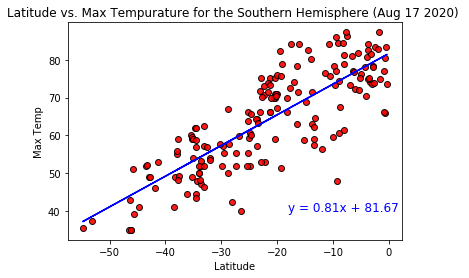

The r-squared is: 0.668145067302753


<Figure size 432x288 with 0 Axes>

In [60]:
Southern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] <0]
Southern_Hemisphere.head()
len(Southern_Hemisphere)
Max_Temp_SH = Southern_Hemisphere["Max Temp"]
Max_Temp_SH
Latitude_SH = Southern_Hemisphere["Latitude"]
Latitude_SH
plt.scatter(Latitude_SH, Max_Temp_SH, marker="o", facecolors="red", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Max Tempurature for the Southern Hemisphere ({Date_For_Graphs}) ")
plt.ylabel('Max Temp')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_SH, Max_Temp_SH)
regress_values = Latitude_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_SH,regress_values,"b-")
plt.annotate(line_eq,(-18, 40),fontsize=12,color="blue")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Max Temp SH Regression")

COMMENTS:
There seems to be a reasonable linear relationship between latitude and the max temp.  As the location of the city moves closer to the Equator, the maximum tempurature is increasing. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

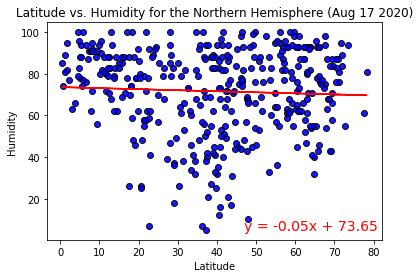

The r-squared is: 0.002332178666673912


<Figure size 432x288 with 0 Axes>

In [54]:
Northern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] >0]
Northern_Hemisphere.head()
len(Northern_Hemisphere)
Humidity_NH = Northern_Hemisphere["Humidity"]
Humidity_NH
Latitude_NH = Northern_Hemisphere["Latitude"]
Latitude_NH
plt.scatter(Latitude_NH, Humidity_NH, marker="o", facecolors="blue", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Humidity for the Northern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Humidity')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_NH, Humidity_NH)
regress_values = Latitude_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_NH,regress_values,"r-")
plt.annotate(line_eq,(47, 5),fontsize=14,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Humidity NH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

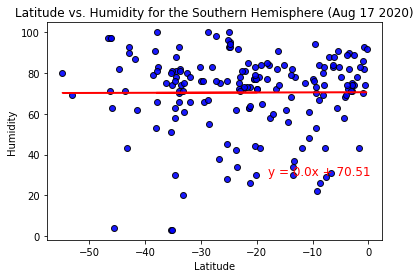

The r-squared is: 5.705392565777783e-06


<Figure size 432x288 with 0 Axes>

In [55]:
Southern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] <0]
Southern_Hemisphere.head()
len(Southern_Hemisphere)
Humidity_SH = Southern_Hemisphere["Humidity"]
Humidity_SH
Latitude_SH = Southern_Hemisphere["Latitude"]
Latitude_SH
plt.scatter(Latitude_SH, Humidity_SH, marker="o", facecolors="blue", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Humidity for the Southern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Humidity')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_SH, Humidity_SH)
regress_values = Latitude_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_SH,regress_values,"r-")
plt.annotate(line_eq,(-18, 30),fontsize=12,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Humidity SH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

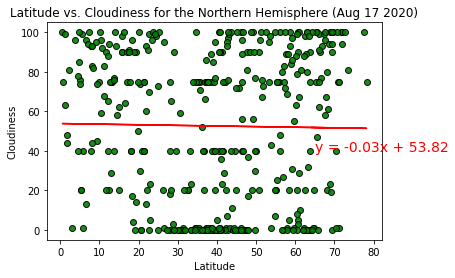

The r-squared is: 0.00026304543370960886


<Figure size 432x288 with 0 Axes>

In [56]:
Northern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] >0]
Northern_Hemisphere.head()
len(Northern_Hemisphere)
Cloudiness_NH = Northern_Hemisphere["Cloudiness"]
Cloudiness_NH
Latitude_NH = Northern_Hemisphere["Latitude"]
Latitude_NH
plt.scatter(Latitude_NH, Cloudiness_NH, marker="o", facecolors="green", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Cloudiness for the Northern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Cloudiness')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_NH, Cloudiness_NH)
regress_values = Latitude_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_NH,regress_values,"r-")
plt.annotate(line_eq,(65, 40),fontsize=14,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Cloudiness NH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

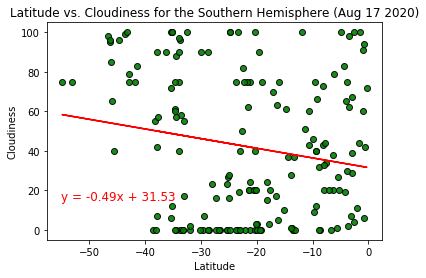

The r-squared is: 0.032616140747310424


<Figure size 432x288 with 0 Axes>

In [57]:
Southern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] <0]
Southern_Hemisphere.head()
len(Southern_Hemisphere)
Cloudiness_SH = Southern_Hemisphere["Cloudiness"]
Cloudiness_SH
Latitude_SH = Southern_Hemisphere["Latitude"]
Latitude_SH
plt.scatter(Latitude_SH, Cloudiness_SH, marker="o", facecolors="green", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Cloudiness for the Southern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Cloudiness')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_SH, Cloudiness_SH)
regress_values = Latitude_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_SH,regress_values,"r-")
plt.annotate(line_eq,(-55, 15),fontsize=12,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Cloudiness SH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

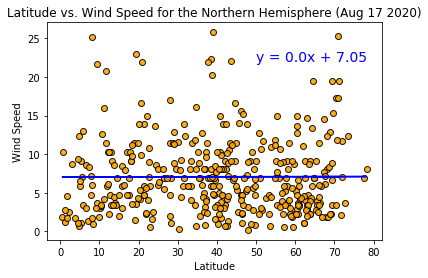

The r-squared is: 6.720617526262879e-06


<Figure size 432x288 with 0 Axes>

In [61]:
Northern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] >0]
Northern_Hemisphere.head()
len(Northern_Hemisphere)
Wind_Speed_NH = Northern_Hemisphere["Wind Speed"]
Wind_Speed_NH
Latitude_NH = Northern_Hemisphere["Latitude"]
Latitude_NH
plt.scatter(Latitude_NH, Wind_Speed_NH, marker="o", facecolors="orange", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Wind Speed for the Northern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_NH, Wind_Speed_NH)
regress_values = Latitude_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_NH,regress_values,"b-")
plt.annotate(line_eq,(50, 22),fontsize=14,color="blue")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Wind Speed NH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

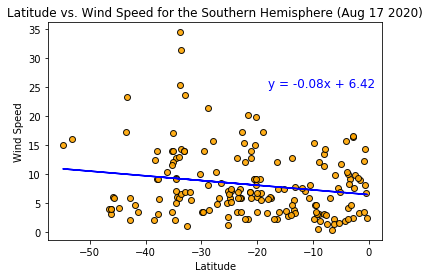

The r-squared is: 0.03503328869151543


<Figure size 432x288 with 0 Axes>

In [63]:
Southern_Hemisphere = Weather_Final.loc[Weather_Final["Latitude"] <0]
Southern_Hemisphere.head()
len(Southern_Hemisphere)
Wind_Speed_SH = Southern_Hemisphere["Wind Speed"]
Wind_Speed_SH
Latitude_SH = Southern_Hemisphere["Latitude"]
Latitude_SH
plt.scatter(Latitude_SH, Wind_Speed_SH, marker="o", facecolors="orange", edgecolors="black",
            s=None, alpha=0.90)
plt.title(f"Latitude vs. Wind Speed for the Southern Hemisphere ({Date_For_Graphs})")
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_SH, Wind_Speed_SH)
regress_values = Latitude_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_SH,regress_values,"b-")
plt.annotate(line_eq,(-18, 25),fontsize=12,color="blue")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Lat vs Wind Speed SH Regression")

COMMENTS:
There is no linear relationship. The correlation coefficient is way to small to determine a correlation between latitude and wind speed.